In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import least_squares
from sklearn.model_selection import TimeSeriesSplit

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [52]:
df = pd.read_csv("data/CU/03.03.2021/USD000000TODWP.csv")
max = len(df)
for index, row in df.iterrows():
    if index < max - 1 and abs(df.loc[index, 'Time'] - df.loc[index + 1, 'Time']) < 1e-3:
        # print(index)
        df.loc[index + 1, 'Volume'] = df.loc[index + 1, 'Volume'] + df.loc[index, 'Volume']
        df.loc[index + 1, 'AskBefore'] = df.loc[index, 'AskBefore']
        df = df.drop([index])

In [53]:
print(max)

9624


In [54]:
len(df)

6882

In [55]:
n = 30
topvol = sorted(df["Volume"])[::-1][0:n]
topindexes = []
for index, row in df.iterrows():
    if row["Volume"] in topvol:
        topindexes.append(row["Unnamed: 0"])

In [59]:
finalindexes = [topindexes[0]]
fl = 1
delta = 200

for i in range(len(topindexes)):
    if topindexes[i] - finalindexes[-1] > delta:
        finalindexes.append(topindexes[i])

In [60]:
finalindexes

[853.0,
 1055.0,
 1263.0,
 1608.0,
 1876.0,
 2313.0,
 2585.0,
 3118.0,
 3970.0,
 4811.0,
 5126.0,
 5837.0,
 6921.0,
 8610.0,
 9571.0]

In [2]:
file = open("USD000UTSTOM_l2_ask.txt", 'r')

m_l = 3000000
wind = 300000

asks = np.full((m_l,), 0.)
times = np.full((m_l,), 0.)



for i in range(m_l + wind):
    try:
        line = next(file)
    except:
        print("cant read even one line")
        file.close()
        break

    if(i >= wind):
        line = line.split()    
        # print(line[2][:-1])   
        asks[i - wind] = float(line[2][:-1])
        times[i - wind] = sum(np.array(line[0].split(":")).astype(float) * np.array([3600, 60, 1])) - 36000

cant read even one line


In [23]:
df = pd.read_csv("data/SE/SNGSPWP.csv")

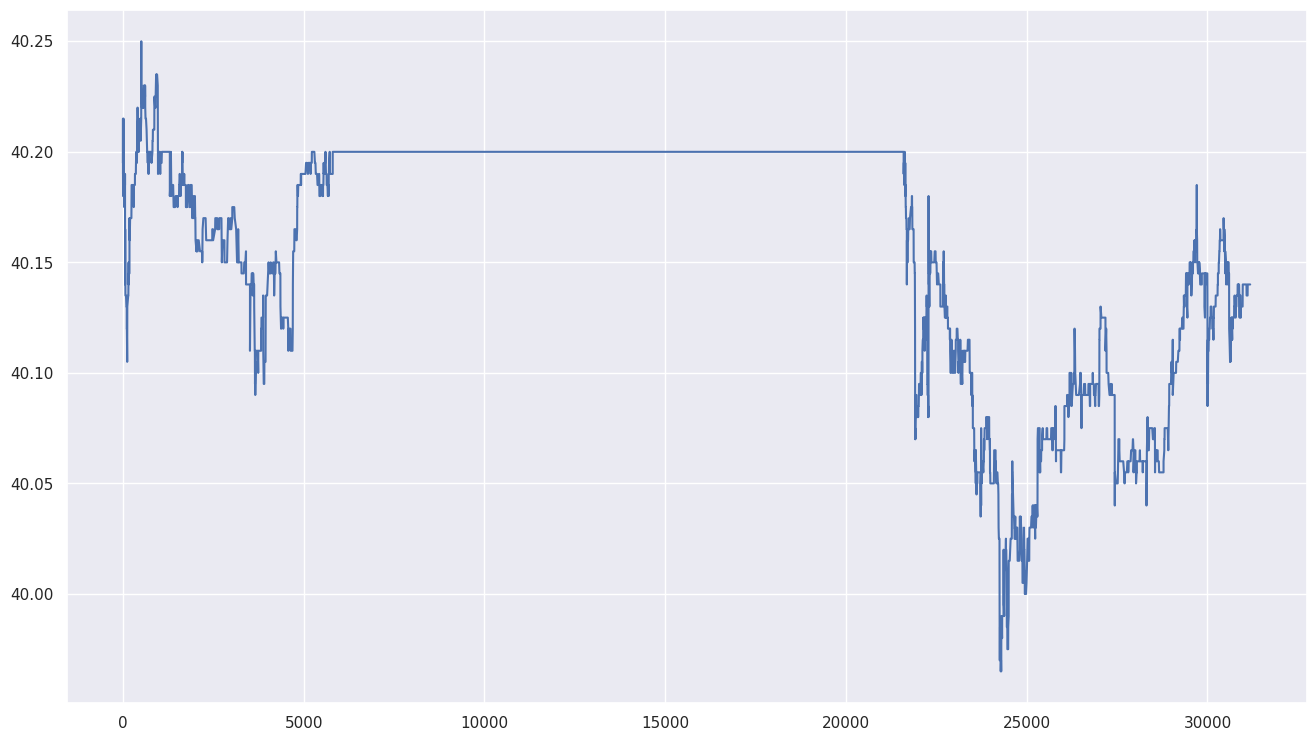

In [24]:
plt.plot(df["Time"], df["AskAfter"])
# plt.ylim(73.42, 73.44)

In [12]:
sum(times==73.4)

0

In [31]:
len(times)

3000000

In [4]:
df = pd.read_csv("data/CU/03.03.2021/USD000000TODWP.csv")

vols = np.array(df["Volume"])
vols.sort()

changes = np.array(df["AskAfter"] - df["AskBefore"])
changes.sort()

dfAskT30 = df[df["AskAfter"] - df["AskBefore"] > 0]
dfVolT30 = df[df["Volume"] > 1e5]

NumsVol = np.array(dfVolT30["Unnamed: 0"])
NumsAsk = np.array(dfAskT30["Unnamed: 0"])

In [10]:
dfAskT30[dfAskT30["AskAfter"] - dfAskT30["AskBefore"] > 0.05]

,Unnamed: 0,Time,AskBefore,AskAfter,AskBeforeMany,AskAfterMany,Volume
4,4,-10767.999988,73.752,73.805,73.975250,73.990000,50000.0
91,91,-6433.999330,73.588,73.840,73.856295,73.856592,1000.0
95,95,-6301.999087,73.623,73.845,73.860780,73.861042,1000.0
103,103,-6092.999536,73.632,73.865,73.887347,73.887620,1000.0
292,292,-1067.999565,73.767,73.830,73.847579,73.849700,21000.0
293,293,-1066.999981,73.767,73.830,73.847682,73.849500,25000.0
358,358,-430.999369,73.625,73.735,73.747025,73.750650,25000.0
388,388,0.000441,73.693,73.757,73.775043,73.778123,40000.0
756,756,703.000682,73.547,73.608,73.610976,73.612800,50000.0
760,760,704.000255,73.532,73.593,73.596868,73.599300,52000.0


In [37]:
len(dfAskT30)

25

In [28]:
np.intersect1d(NumsVol, NumsAsk)

array([ 20, 106])

In [29]:
filename = "../data preparing/USD000UTSTOM_l2_ask.txt"

In [7]:
def next_asks(filename, mem_len, deal_number):
    a = 0
    file = open(filename, 'r')

    asks = np.full((mem_len + 1, 2), 0, dtype=float)

    number = 0  

    try:
        line = next(file)
    except:
        print("cant read even one line")
        file.close()
        return []  
       
    while True:
        try:
            line = next(file)
        except:
            break   

        if line[0] != "P":
            # print(line)
            line = line.split()
            price = float(line[2][:-1])
            time = sum(np.array(line[0].split(":")).astype(float) * np.array([3600, 60, 1])) - 36000
        else:
            # print(line)
            # print(number)
            if number == deal_number:
                line = line.split()
                
                asks[0][0] = price
                asks[0][1] = time    
                
                for j in range(1, mem_len + 1):
                    try:
                        line = next(file)
                    except:
                        break

                    if line[0] == "P":
                        line = line.split()
                        a += 1
                        continue    

                    line = line.split()
                    if(abs(float(line[2][:-1])) < 1e-5):
                        print(line)
                    asks[j - a][0] = float(line[2][:-1])
                    asks[j - a][1] = sum(np.array(line[0].split(":")).astype(float) * np.array([3600, 60, 1])) - 36000
                return asks

            number += 1 
    file.close()
    return asks

In [8]:
def plot_asks(filename, mem_len, deal_num):
    asks = next_asks(filename, mem_len, deal_num)
    fb = np.where(asks == 0)[0][0]
    print(fb)
    asks = asks[:fb]
    plt.plot(asks[:, 1], asks[:,0])

In [9]:
def OWdynamics(steady_state, volume, kappa, rho):
    def OW(t):
        return steady_state + volume * kappa * np.exp(- rho * t)
    
    return OW

In [10]:
def fitOW(times, asks, volume):
    def fun(x, ask, t):
        return x[0] +  x[1] * np.exp(- x[2] * t) - ask
    

    res_lsq01 = least_squares(fun, np.array([asks[0], 0.1, 1]), args=(times, asks))
    print(res_lsq01.x)

    return OWdynamics(res_lsq01.x[0], volume, res_lsq01.x[1], res_lsq01.x[2])

In [11]:
def fitOW2p(ask1, ask2, t1, t2, steady):
    r = np.log((ask1 - steady)/(ask2 - steady)) / (t2 - t1)
    lamb = (ask1 - steady)/np.exp(-r * t1)

    return OWdynamics(steady, 1, lamb, r)

In [12]:
asks = next_asks(filename, 110000, 0)
fb = np.where(asks == 0)[0][0]
print(fb)
asks = asks[:fb]

106230


In [30]:
asks[-1, 1]

3794.0006770440013

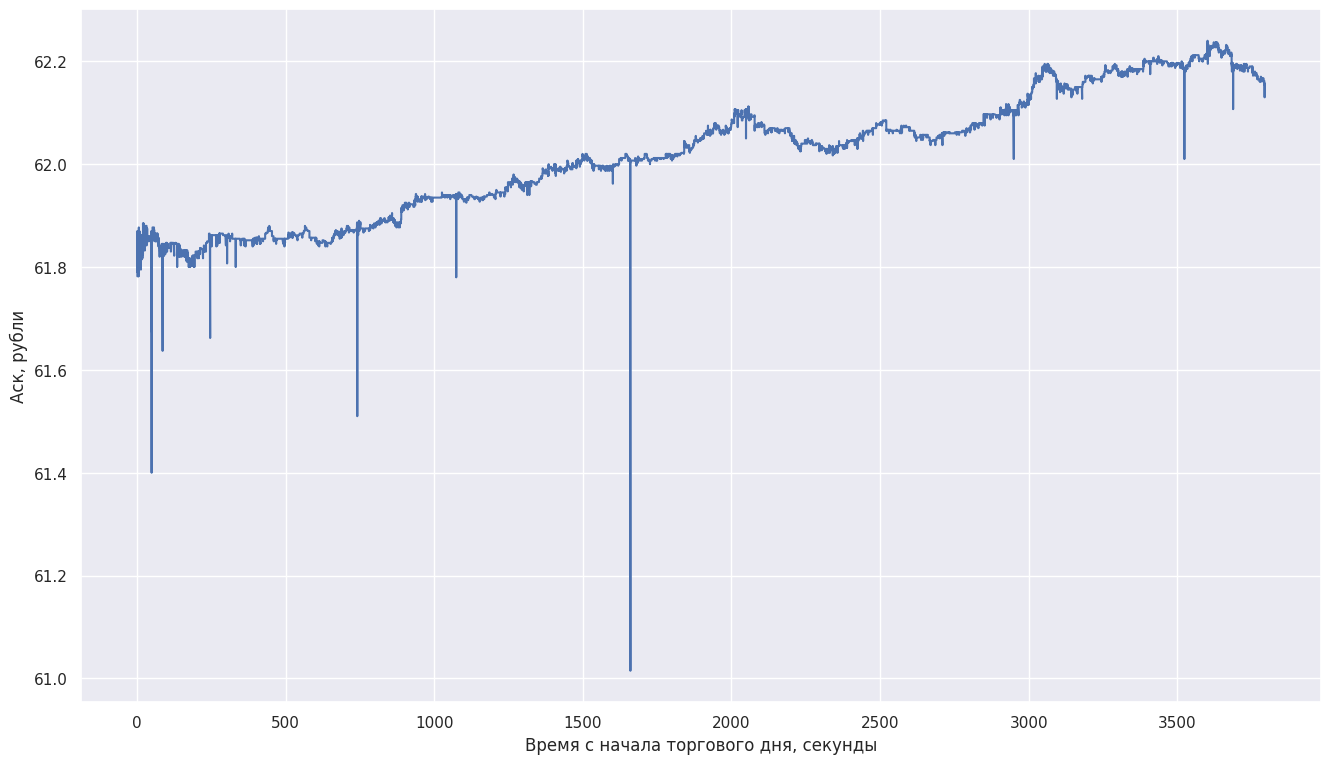

In [14]:
plt.plot(asks[:, 1], asks[:,0])
plt.ylabel("Аск, рубли")
plt.xlabel("Время с начала торгового дня, секунды")
plt.savefig("Palki.pdf")

# plt.plot(asks[:, 1], OWf(asks[:, 1]) + 61.54)

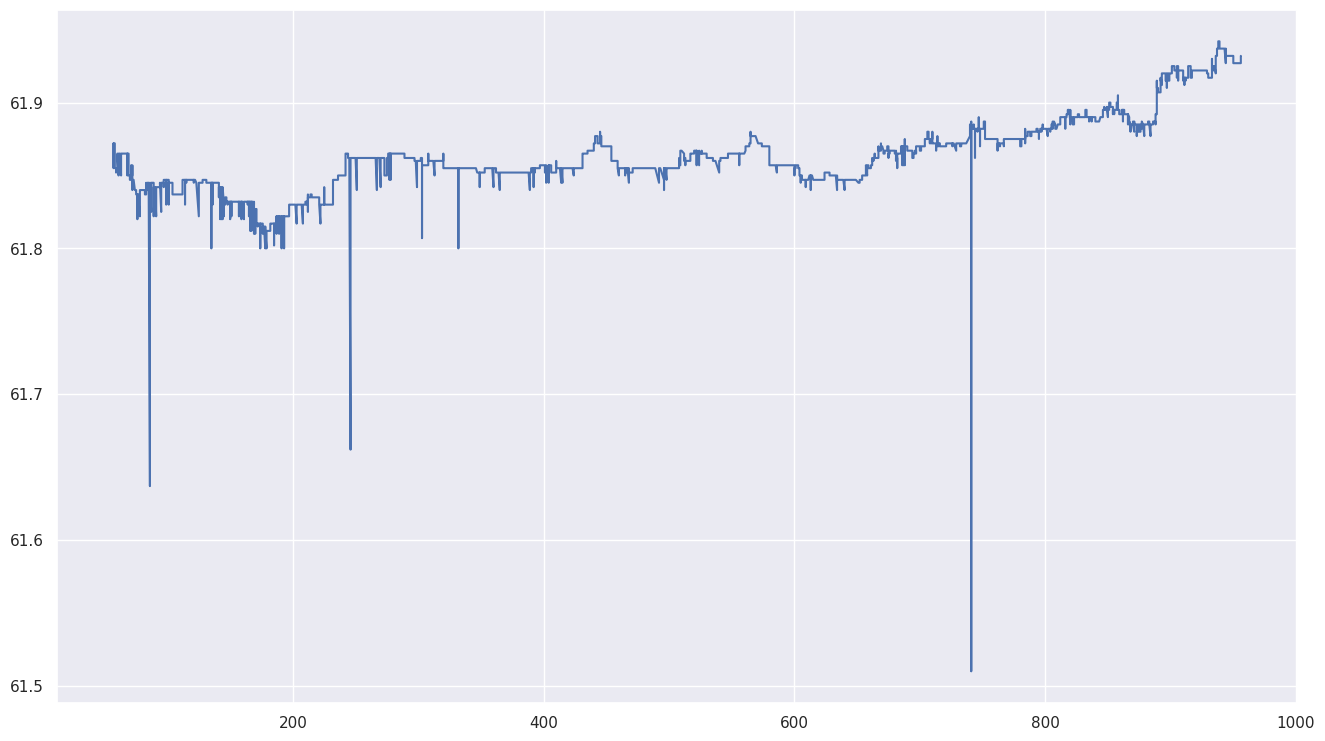

In [40]:
a = 5000

pasks = asks[a:a+20000]
plt.plot(pasks[:, 1], pasks[:,0])
plt.savefig("AsksHistory.pdf")